In [28]:
import os
import pandas
import seaborn
import swasputils
import numpy

In [2]:
df = pandas.read_csv(
    os.path.join(swasputils.DATA_LOCATION, 'vespa-export.csv'),
)
df.head()

,SuperWASP ID,Period Length,RA,Dec,Maximum magnitude,Minimum magnitude,Mean magnitude,Amplitude,Classification,Classification count,Folding flag,Sigma,Chi squared
0,1SWASPJ000126.73-001344.2,24007.58594,0h01m26.73s,-0d13m44.2s,14.023840,21.350196,14.870849,7.326356,Pulsator,4,Uncertain,6.22,37.37
1,1SWASPJ000236.45+002446.3,16595.36914,0h02m36.45s,0d24m46.3s,13.998806,16.670559,14.678380,2.671753,EW,7,Certain,4.51,21.07
2,1SWASPJ000236.45+002446.3,20553.37500,0h02m36.45s,0d24m46.3s,13.998806,16.670559,14.678380,2.671753,EA/EB,7,Uncertain,5.88,30.41
3,1SWASPJ000236.45+002446.3,27404.40430,0h02m36.45s,0d24m46.3s,13.998806,16.670559,14.678380,2.671753,EW,4,Certain,4.90,25.00
4,1SWASPJ000236.20+002516.3,27404.29492,0h02m36.2s,0d25m16.3s,14.079385,17.870184,14.824788,3.790799,EA/EB,5,Certain,4.54,21.15


In [30]:
df['Amplitude norm'] = df['Amplitude'] / df['Mean magnitude']
df.replace([numpy.inf, -numpy.inf], numpy.nan, inplace=True)
df.head()

,SuperWASP ID,Period Length,RA,Dec,Maximum magnitude,Minimum magnitude,Mean magnitude,Amplitude,Classification,Classification count,Folding flag,Sigma,Chi squared,Amplitude norm
0,1SWASPJ000126.73-001344.2,24007.58594,0h01m26.73s,-0d13m44.2s,14.023840,21.350196,14.870849,7.326356,Pulsator,4,Uncertain,6.22,37.37,0.492666
1,1SWASPJ000236.45+002446.3,16595.36914,0h02m36.45s,0d24m46.3s,13.998806,16.670559,14.678380,2.671753,EW,7,Certain,4.51,21.07,0.182020
2,1SWASPJ000236.45+002446.3,20553.37500,0h02m36.45s,0d24m46.3s,13.998806,16.670559,14.678380,2.671753,EA/EB,7,Uncertain,5.88,30.41,0.182020
3,1SWASPJ000236.45+002446.3,27404.40430,0h02m36.45s,0d24m46.3s,13.998806,16.670559,14.678380,2.671753,EW,4,Certain,4.90,25.00,0.182020
4,1SWASPJ000236.20+002516.3,27404.29492,0h02m36.2s,0d25m16.3s,14.079385,17.870184,14.824788,3.790799,EA/EB,5,Certain,4.54,21.15,0.255707


C:\Users\anm83\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\anm83\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\anm83\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\anm83\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\anm83\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\anm83\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

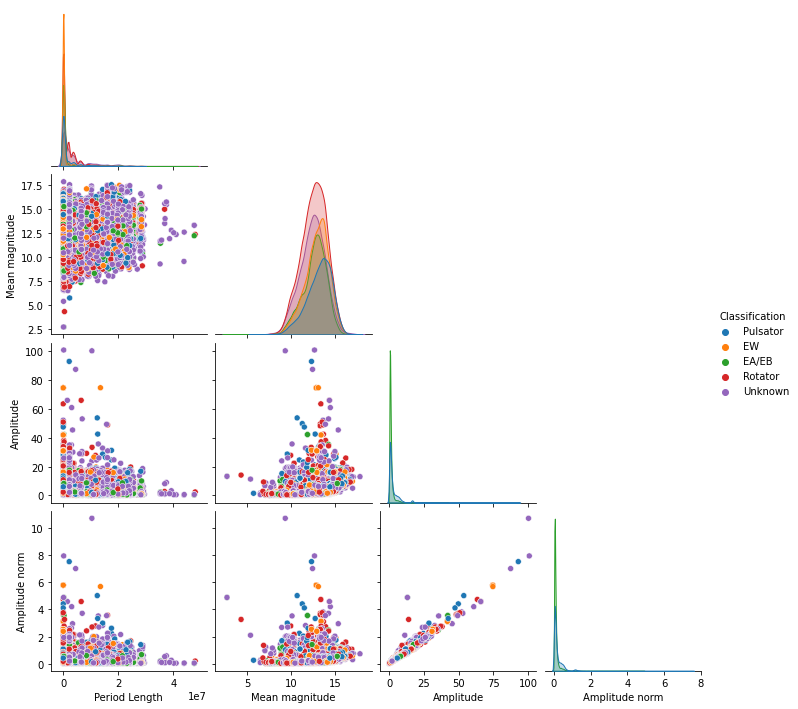

In [5]:
seaborn.pairplot(
    df[['Period Length', 'Mean magnitude', 'Amplitude', 'Amplitude norm', 'Classification']],
    hue='Classification',
    corner=True,
)

C:\Users\anm83\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\anm83\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\anm83\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\anm83\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


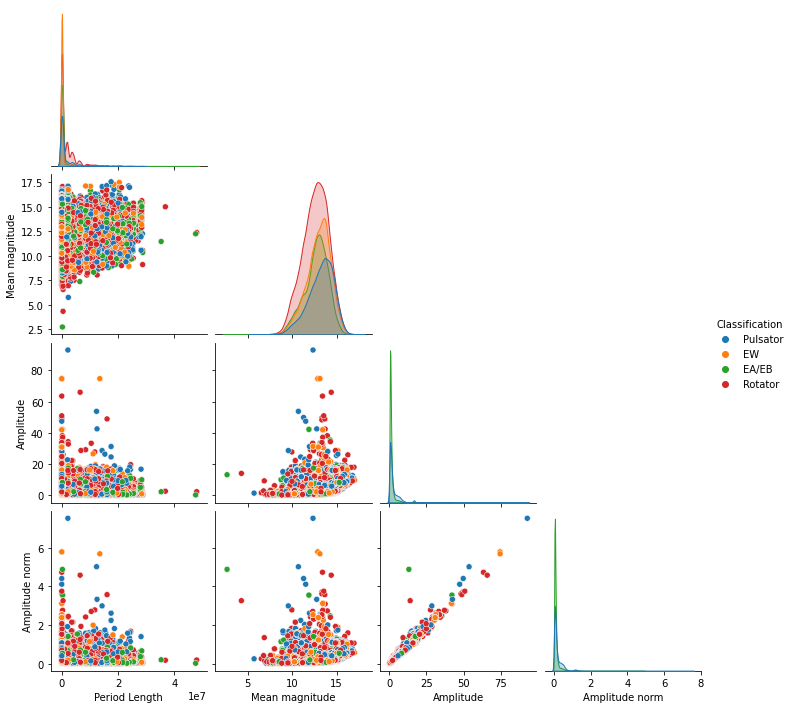

In [7]:
seaborn.pairplot(
    df[df['Classification']!='Unknown'][['Period Length', 'Mean magnitude', 'Amplitude', 'Amplitude norm', 'Classification']],
    hue='Classification',
    corner=True,
)

[None, None]

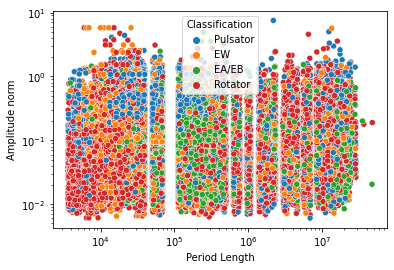

In [43]:
splot = seaborn.scatterplot(
    data=df[df['Classification']!='Unknown'][['Period Length', 'Amplitude norm', 'Classification']],
    hue='Classification',
    x='Period Length',
    y='Amplitude norm',
)
splot.set(xscale="log", yscale="log")

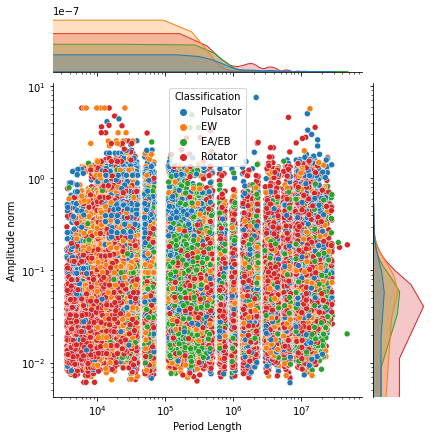

In [40]:
jplot = seaborn.jointplot(
    data=df[df['Classification']!='Unknown'][['Period Length', 'Amplitude norm', 'Classification']],
    hue='Classification',
    x='Period Length',
    y='Amplitude norm',
)
jplot.ax_joint.set_xscale('log')
jplot.ax_joint.set_yscale('log')

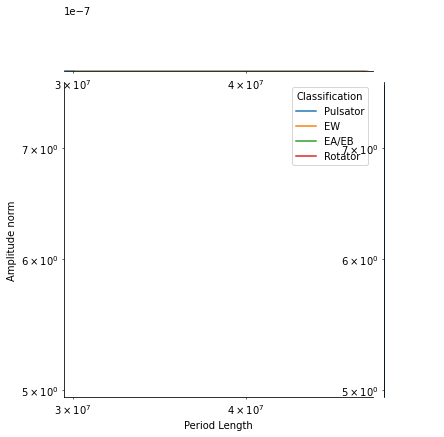

In [39]:
jplot = seaborn.jointplot(
    data=df[df['Classification']!='Unknown'][['Period Length', 'Amplitude norm', 'Classification']],
    hue='Classification',
    x='Period Length',
    y='Amplitude norm',
    kind='kde',
)
jplot.ax_joint.set_xscale('log')
jplot.ax_joint.set_yscale('log')

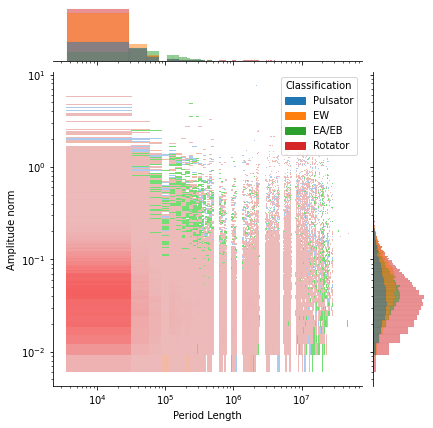

In [41]:
jplot = seaborn.jointplot(
    data=df[df['Classification']!='Unknown'][['Period Length', 'Amplitude norm', 'Classification']],
    hue='Classification',
    x='Period Length',
    y='Amplitude norm',
    kind='hist',
)
jplot.ax_joint.set_xscale('log')
jplot.ax_joint.set_yscale('log')

In [42]:
jplot = seaborn.jointplot(
    data=df[df['Classification']!='Unknown'][['Period Length', 'Amplitude norm', 'Classification']],
    hue='Classification',
    x='Period Length',
    y='Amplitude norm',
    kind='hex',
)
jplot.ax_joint.set_xscale('log')
jplot.ax_joint.set_yscale('log')

ValueError: Use of `hue` with `kind='hex'` is not currently supported.